# Competition Details


<img src="https://miro.medium.com/max/1400/0*v6hu3LvLlVrK-8JX.png" width="900px" height="400px">

The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning. Suppose you ask a question on Quora, and get some suggested answers. These answers corrosponds to questions which are similar to the one you have asked. 

#### My Opinion:
- If you get suggested wrong answers, then it is more damaging to the end-user, than compared to the situation where Quora Model is unable to suggest available answers to already asked similar questions. 

#### Hence, we should penalise the model more if it misclassifies a Question as Duplicate, i.e., False Positives as compared to miss-classified as Not-Duplicate

### ***If You find this Kernel Helpful, do Upvote & share your opinion in the comments***
<div style="font-size:17px;font-family:Georgia;color:#254E58;overflow:hidden">
    <p style="color:red"><b><i>Hey guys! <br>This is my first project on NLP, specifically on Text Similarity.</i></b></p> 
</div>

# Solution & Methodology
<div style="background-color:#F8F6F0;font-size:17px;font-family:Georgia;border-style: solid;border-color: #EDE6D6;border-width:1px;padding:20px;margin: 0px;color:#254E58;overflow:hidden">
    <p style="color:blue"><b>1) I have extracted Features for Similarity Measures Like</b></p> 
    <ul style="font-size:14px">
        <li>Proportion of Common Words, Tokens & stop words between Question Pairs</li>
        <li>TF-IDF vectors of the Question Pairs and cosine similarity between them</li>
        <li>Longest common substring</li>
        <li>Fuzzy Similarity Ratios based on Levenstein Distance</li>
    </ul>
</div>

<div style="background-color:#F8F6F0;font-size:17px;font-family:Georgia;border-style: solid;border-color: #EDE6D6;border-width:1px;padding:20px;margin: 0px;color:#254E58;overflow:hidden">
    <p style="color:blue"><b>2) I have clustered these ~5.3 Lakh Questions into 9 Buckets, and extracted a Feature - Do Both Questions belong in same cluster ? (0 or 1)</b></p> 
    <p>Check out the Cluster Visuals in 2-D, and the WordClouds generated from these Cluster</p>
</div>


<div style="background-color:#F8F6F0;font-size:17px;font-family:Georgia;border-style: solid;border-color: #EDE6D6;border-width:1px;padding:20px;margin: 0px;color:#254E58;overflow:hidden">
    <p style="color:blue"><b>3) Total 29 Features were generated and fit into Logistic Regression, Naive Bayes, KNN(k=5) & Random Forest Classifier.</b></p> 
    <ul style="font-size:14px">
        <li>RF gave the highest Accuracy 0.82, followed by Log-Reg & KNN (~0.77). Log-loss from RF was the lowest. So, in final model prediction, we have used RF.</li>
        <li>Not used Logistic Regression, since Log-Odds may not be Linearly Related to Independent variables, and we may not be able to create a Odd-Ratio Table</li>
    </ul>
</div>

<div style="background-color:#F8F6F0;font-size:17px;font-family:Georgia;border-style: solid;border-color: #EDE6D6;border-width:1px;padding:20px;margin: 0px;color:#254E58;overflow:hidden">
    <p style="color:blue"><b>4) Log-Loss from RF was the lowest (0.17) in Train Data, which spiked to 0.72 in Test Submission. This means, distribution of data changed drastically from Train to Test</b></p> 
</div>

# Key-Insights
- Percentage of Questions with '?' (not necessarily ending with): 99.864 %
- Number of Math based questions:  0.138647 %

**Questions with multiple parts**: 5.542 %

**Examples of Questions with subparts** :
- 'How safe is it to take 90 mg of codeine? What are the health concerns?', 
- 'Which is the best 50" tv to buy in India? Very confused with sony Samsung or lg? And confused with 4k n full hd.!'

**Personal or Opinion-based questions**: 12.038 %

**Examples of some Personal Or Opinion-based questions**:  
- 'Who do you think is the biggest actor in Bollywood?', 
- 'What things you can do on the internet to make money?'

# Contents

Table of Content
<br><a href="#1">1. Data Definations</a>
<br><a href="#2">2. Is data imbalanced</a>
<br><a href="#3">3. Checking Missing values</a>
<br><a href="#4">4. Check number of unique questions and duplicates in whole corpus</a>
<br><a href="#5">5. Distribution of repeated Questions</a>
<br><a href="#6">6. Text Pre-processing</a>
<br><a href="#7">7. Clustering of Questions</a>
<br><a href="#8">8. Word-Clouds of different Questions Cluster</a>
<br><a href="#9">9. Basic Feature Extraction</a>
<br><a href="#10">10. Advanced Text Feature Extraction</a>
<br><a href="#11">11. Fuzzy Text Similarity Feature Extraction</a></a>
<br><a href="#12">12. Finding Cosine Similarity from TF-IDF Text Vectors</a>
<br><a href="#13">13. Model Fitting</a>
<br><a href="#14">14. Logistic Model Performance</a></a>
<br><a href="#15">15. Different Classification Model Performance Comparison</a>
<br><a href="#16">16. Varying threshold to minimise False Duplicates</a>
<br><a href="#17">17. K-Fold Cross Validation</a></a>
<br><a href="#18">18. Confidence Interval & p-value of Coefficients of Logistic Regression</a></a></a>
<br><a href="#19">19. Importing Test data</a></a>
<br><a href="#20">20. Missing values in Test Dataset</a></a>
<br><a href="#21">21. Analysis of Unique & Repeated Questions in Test Set</a></a>
<br><a href="#22">22. Test Data: Pre-processing of Text</a></a>
<br><a href="#23">23. Clustering of Questions</a></a>
<br><a href="#24">24. Basic Text-Feature Engineering</a></a>
<br><a href="#25">25. Advanced Text-Feature Engineering in Test Data</a></a>
<br><a href="#26">26. Fuzzy Text-Similarity Ratios Extracted from Test Data</a></a>
<br><a href="#27">27. Cosine Similarity Extracted for Test data</a>
<br><a href="#28">28. Training Random Forrest Classifier Model on entire Train dataset</a>
<br><a href="#29">29. Prediction on Test set & Submission</a>

## <a id="1">1. Dataset Description</a>

Data fields
* id - the id of a training set question pair
* qid1, qid2 - unique ids of each question (only available in train.csv)
* question1, question2 - the full text of each question
* is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise

## Things to explore:
* Clustering of similar questions
* Common word shares between Question Pairs
* Common words/total Question lengths
* Q1 & Q2 cosine similarity
* Q1 & Q2 length

In [1]:
!pip install distance
#!pip install autogluon
import os
import re
import distance
import numpy as np 
import pandas as pd 
import seaborn as sns
from tqdm import tqdm
from sklearn import svm
from fuzzywuzzy import fuzz
from sklearn import metrics
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import Image
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16276 sha256=880694757c53e451ac74c3bdae9b3d20bddf5c359e3deb1f5ef9b3fdb16c7ecb
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance
/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip
/kaggle/input/clustering/cluster_analysis.png
/kaggle/input/clustering/questions_cluster_visuals.PNG
/kaggle/input/wordcloud/word-cloud.PNG


In [2]:
df_train =  pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
print("Train Data Imported!")
df_train.shape

Train Data Imported!


(404290, 6)

## <a id="2">2. Is data imbalanced ?</a>

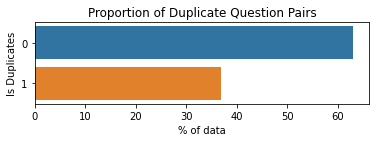

In [3]:
fig= plt.figure(figsize=(6,1.5))
sns.barplot(x=100*df_train['is_duplicate'].value_counts()/len(df_train),
            y=(100*df_train['is_duplicate'].value_counts()/len(df_train)).index,orient='h',).set(ylabel="Is Duplicates",xlabel="% of data",title="Proportion of Duplicate Question Pairs")
plt.show()

We have 63% of Non-duplicates, 37% of duplicates, signifiy slighlty imbalanced dataset


## <a id="3">3. Checking Missing values</a>

In [4]:
df_train.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [5]:
ques2_list = df_train.loc[df_train['question1'].isnull(),'question2'].values
ques1_list = df_train.loc[df_train['question2'].isnull(),'question1'].values

In [6]:
display(df_train[df_train['question1'].isin(ques1_list)])
display(df_train.loc[df_train['qid2']==174364,:])

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
263095,263095,174363,239239,How can I develop android app?,What is the best way of creating Android apps?...,0


,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


Question2 with qid2=174364 is the only missing among Question2 with no other occurances

In [7]:
display(df_train[df_train['question2'].isin(ques2_list)])
display(df_train.loc[df_train['qid1']==493340,:])

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


Question1 with qid1= 493340 is the only missing among Question1 with no other occurances

**Conclusion**
* Since, we can't find any occurances of these missing questions, bettter to drop these rows
* Only 3 rows have a missing question overall (out of 404290 Question Pairs). Hence we can delete these 3 missing Question Pairs

Dropping these 3 rows with missing Question Pairs

In [8]:
df = df_train.loc[~df_train.isnull().any(axis=1),:].copy()
print("Any Rows with Missing Data: ",(df.isna().sum()>0).any())
df['question1'] = df.loc[:,'question1'].apply(lambda x: str(x).strip())
df['question2'] = df.loc[:,'question2'].apply(lambda x: str(x).strip())

Any Rows with Missing Data:  False


## <a id="4">4. Check number of unique questions and duplicates in whole corpus</a>

In [9]:
questions_list = pd.concat([df['question1'] , df['question2']] )
unique_quesList = questions_list.value_counts()[questions_list.value_counts()==1].index
duplicate_quesList = questions_list.value_counts()[questions_list.value_counts()>1].index
print("Number of Questions which are unique: ",len(unique_quesList))
print("Number of Questions which are repeated: ",len(duplicate_quesList))
print("Total number of unique questions in dataset: ",len(questions_list.value_counts()))

Number of Questions which are unique:  425464
Number of Questions which are repeated:  111873
Total number of unique questions in dataset:  537337


## <a id="5">5. Distribution of repeated Questions</a>

In [10]:
rep_ques = questions_list.value_counts()[questions_list.value_counts()>1]
rep_ques

What are the best ways to lose weight?                                                    161
How can you look at someone's private Instagram account without following them?           120
How can I lose weight quickly?                                                            111
What's the easiest way to make money online?                                               88
Can you see who views your Instagram?                                                      79
                                                                                         ... 
How do I get girls to see me sexually?                                                      2
Why doesn't IndiGo airlines have a loyalty/frequent flyer program like other airlines?      2
How do I calculate resistance?                                                              2
Can we use non Tata sky dish antenna for Tata Sky set top box?                              2
Is cat worth a 1 year drop?                                 

Maximum number of times a single question is repeated:  161



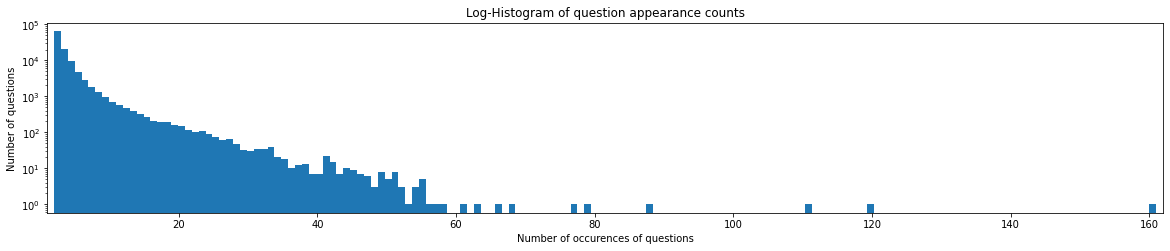

In [11]:
plt.figure(figsize=(20, 3.5))
plt.hist(rep_ques, bins=160)
plt.yscale('log')
plt.xlim((1,162))
plt.title('Log-Histogram of question appearance counts')
plt.xlabel("Number of occurences of questions")
plt.ylabel("Number of questions")
print('Maximum number of times a single question is repeated:  {}\n'.format(max(rep_ques)))
plt.show()

In [12]:
document_corpus = list(set(list(df['question1']) + list(df['question2'])))
math_q = [q  for q in document_corpus if '[math]' in q]

print("Percentage of Questions with '?' (not necessarily ending with): {0:.3f} %".format(100*len([q  for q in document_corpus if '?' in q])/len(document_corpus)))
print("Percentage of Questions not having '?': {0:.3f} %".format(100*len([q  for q in document_corpus if '?' not in q])/len(document_corpus)))
print("Number of Math based questions:  {0:3f} %".format(100*len(math_q)/len(document_corpus)))
print("Questions with multiple parts: {0:.3f} %".format(100*len([ q for q in document_corpus if len(q.split('?'))>2 ])/len(document_corpus) ))
print("\nExamples of Questions with subparts : ",[ q for q in document_corpus if len(q.split('?'))>2 ][0:2]) 
print("\nPersonal or Opinion-based questions: {0:.3f} %".format(100*len([q for q in document_corpus if ('you' in q) or (' i ' in q) ])/len(document_corpus)))
print("\nSome Personal Or Opinion-based questions: ", [q for q in document_corpus if 'you' in q][:2])

Percentage of Questions with '?' (not necessarily ending with): 99.864 %
Percentage of Questions not having '?': 0.136 %
Number of Math based questions:  0.138647 %
Questions with multiple parts: 5.542 %

Examples of Questions with subparts :  ['My current research topic is on implementation of welfare schemes of the tea workers? So which statistical I should use for getting the result?', "Why don't mathematicians like to use the mathematical notations used by phyicists? Do they find that those notations which represent the same things are more elegant?"]

Personal or Opinion-based questions: 12.038 %

Some Personal Or Opinion-based questions:  ['How did your opinion of Orthodox Jews change from reading about them in the press to actually getting to know them personally?', 'How do you know if you need to see a psychologist or a psychiatrist or both?']


## <a id="6">6. Text Pre-processing</a>

In [13]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [14]:
%%time
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)
print("Train Data Text Pre-processing Done!")

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


Train Data Text Pre-processing Done!
CPU times: user 4min 7s, sys: 1.02 s, total: 4min 8s
Wall time: 4min 8s


## <a id="7">7. Clustering of Questions</a>

100%|██████████| 8/8 [09:33<00:00, 71.74s/it]


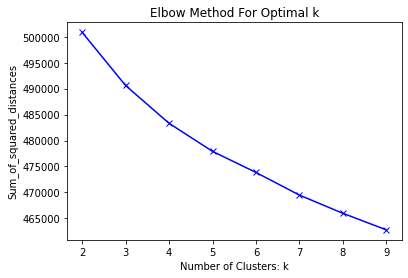

Finding Optimal Cluster Number Done!
CPU times: user 33min 21s, sys: 12.4 s, total: 33min 34s
Wall time: 10min 2s


<Figure size 432x288 with 0 Axes>

In [15]:
%%time
document_corpus = list( set(list(df['question1']) + list(df['question2'])) )
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
x = vectorizer.fit_transform(document_corpus)

Sum_of_squared_distances = []
for k in tqdm(range(2,10)):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(range(2,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters: k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Finding Optimal Cluster Number Done!")
plt.savefig("cluster_analysis.png")


**Conclusion**

Here, we see that, at Cluster number=5, there is a slight dip, post which Sum of Sq Distance dips linearly.
So, we take optimum cluster number as 5 & map the cluster to the respective question

standardised


100%|██████████| 8/8 [33:28<00:00, 251.04s/it]


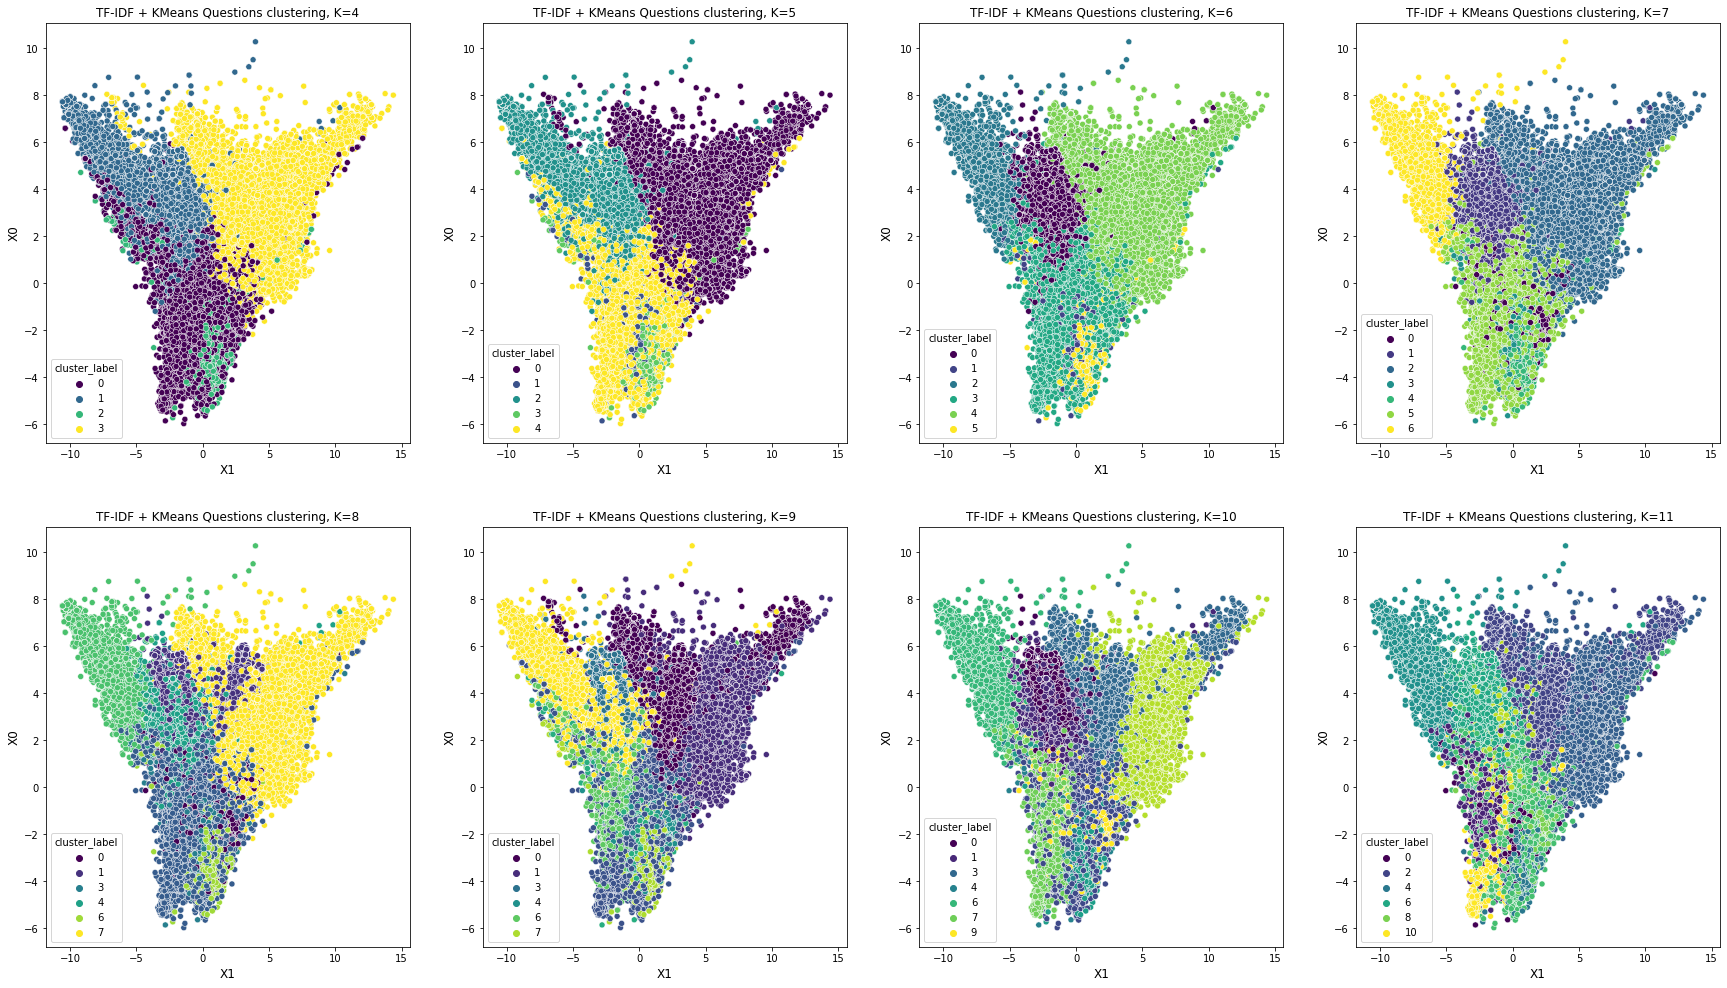

CPU times: user 1h 54min 7s, sys: 2min 38s, total: 1h 56min 46s
Wall time: 36min 22s


In [16]:
%%time
document_corpus = list(set(list(df['question1']) + list(df['question2'])))
questions_cluster = pd.DataFrame({'questions':document_corpus, 'cluster_label':None})
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
x = vectorizer.fit_transform(questions_cluster['questions'].values)
sc_x = StandardScaler()
std_x = sc_x.fit_transform(x.toarray())
print("standardised")
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,17))
i=1
for k in tqdm(range(4,12)):
    km = KMeans(n_clusters=k, max_iter=500, n_init=20)
    km = km.fit(x)
    questions_cluster['cluster_label'] = km.labels_
    pca = PCA(n_components=2, random_state=42)
    pca_vecs = pca.fit_transform(std_x)
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]
    questions_cluster['x0']=x0
    questions_cluster['x1']=x1
    plt.subplot(2,4,i)
    plt.title("TF-IDF + KMeans Questions clustering, K="+str(k), fontdict={"fontsize": 12})
    plt.xlabel("X1", fontdict={"fontsize": 12})
    plt.ylabel("X0", fontdict={"fontsize": 12})
    sns.scatterplot(data=questions_cluster, x='x1', y='x0', hue='cluster_label', palette="viridis")
    i+=1
plt.show()


## <a id="8">8. Major words in each word cloud</a>
Using Optimum Cluster Number as 9. 

100%|██████████| 9/9 [00:14<00:00,  1.59s/it]


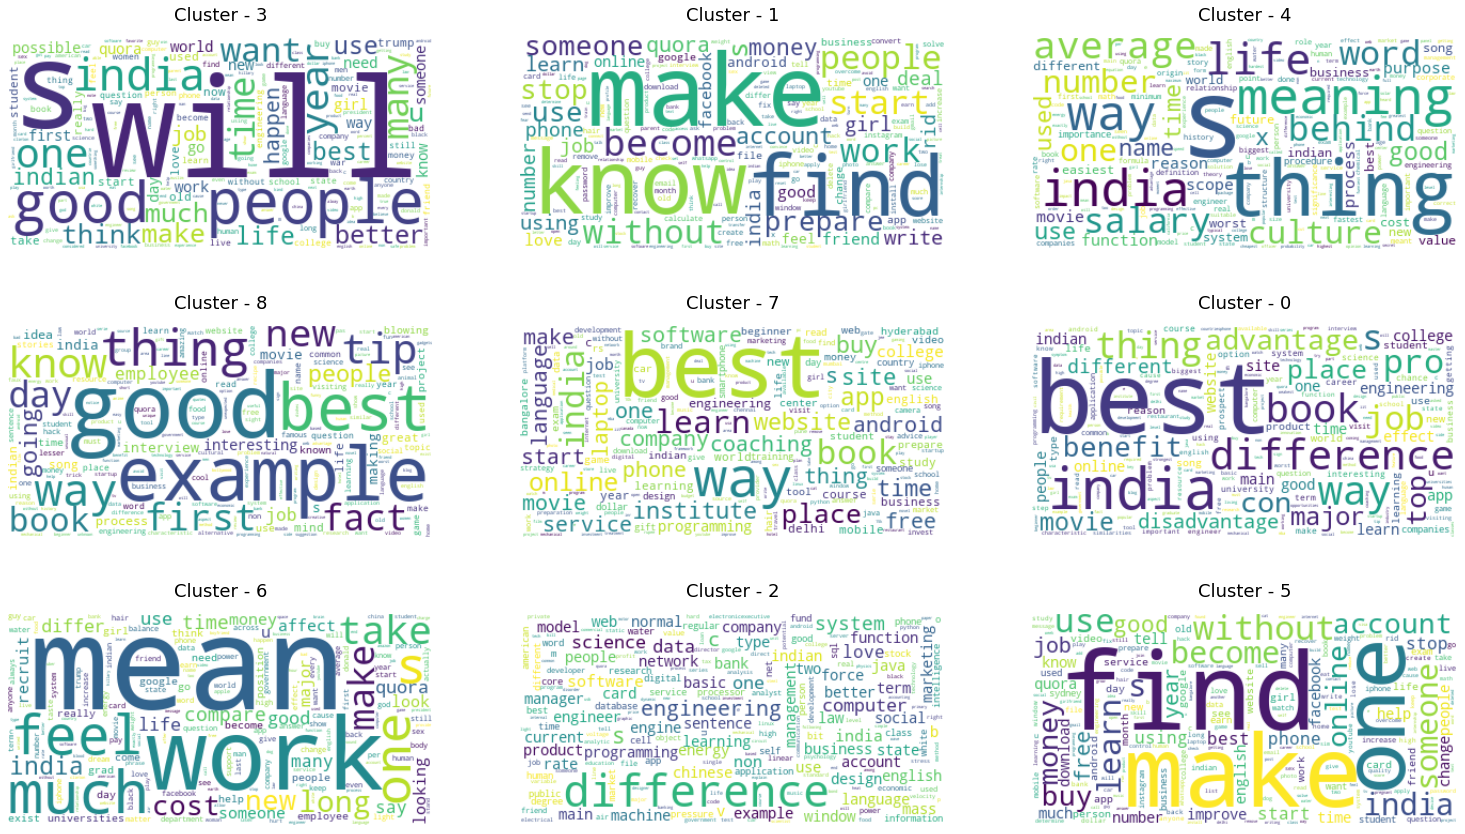

CPU times: user 20min 34s, sys: 11 s, total: 20min 45s
Wall time: 7min 36s


In [17]:
%%time
document_corpus = list(set(list(df['question1']) + list(df['question2'])))
questions_cluster = pd.DataFrame({'questions':document_corpus, 'cluster_label':None})
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,4))
x = vectorizer.fit_transform(questions_cluster['questions'].values)
km = KMeans(n_clusters=9, max_iter=500, n_init=30)
km = km.fit(x)
questions_cluster['cluster_label'] = km.labels_


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(26,15))
i=1
for cluster in tqdm(questions_cluster['cluster_label'].unique()):
    questions = " ".join(questions_cluster[questions_cluster['cluster_label']==cluster]['questions'].values)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(questions)
    plt.subplot(3,3,i)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title("Cluster - "+str(cluster), fontsize=18,pad=17)
    plt.axis("off")
    i+=1
    
#fig.delaxes(axes.flatten()[5])
plt.show()


Analysing Clusters 

In [18]:
len(['how' in q for q in questions_cluster.loc[questions_cluster['cluster_label']==1,['questions']].values]),#questions_cluster.loc[questions_cluster['cluster_label']==0,['questions']].values[:5] 

(46426,)

In [19]:
print(len(['what' in q for q in questions_cluster.loc[questions_cluster['cluster_label']==2,['questions']].values]))
questions_cluster.loc[questions_cluster['cluster_label']==2,['questions']].values[10:],questions_cluster.loc[questions_cluster['cluster_label']==3,['questions']].values[10:] 

8282


(array([['what is the difference between the a form and b form of dna'],
        ['what is the difference between an expat and an immigrant'],
        ['define melting point and boiling point  what is the difference'],
        ...,
        ['what is the difference between friction and coefficient of friction'],
        ['what is the difference between indicated air speed and true air speed'],
        ['what is the difference between seizures and convulsions']],
       dtype=object),
 array([['how do i have biology as an additional subject after class 12th while doing the 1st year of my engineering from a private college'],
        ['how much money per hour do uber drivers make in bangor  me  what is the most a person can reasonably make per month'],
        ['why do children and old people behave similarly'],
        ...,
        ['is it physically possible to live off sunflower seeds'],
        ['why are we so afraid of making mistakes'],
        ['was quora down']], dtype=object))

In [20]:
questions_cluster.loc[questions_cluster['cluster_label']==4,['questions']].values[10:],questions_cluster.loc[questions_cluster['cluster_label']==5,['questions']].values[10:] 

(array([['is the arduino suitable for prototyping a hardware company'],
        ['adult contemporary is what demographic'],
        ['is onlydomains a scam'],
        ...,
        ['what is the scope of agriculture in germany'],
        ['what is the average roi for casual fast food restaurants'],
        ['what is the meaning of hindi word  भ दभ व   bhedbhaav']],
       dtype=object),
 array([['how can i invest in protonmail  proton technologies ag'],
        ['how can i recover deleted chat from facebook'],
        ['how can i survive from an emp attack to the grid'],
        ...,
        ['what sales tools can be built using web scraping'],
        ['can a mbbs become a commercial pilot'],
        ['can a fighter jet fly in space']], dtype=object))

LABELLING CLUSTER LABELS

In [21]:
df = pd.merge( left=pd.merge(left=df, right=questions_cluster, left_on="question1", right_on="questions"), right=questions_cluster , left_on="question2", right_on="questions")
df.drop(["questions_x","questions_y"], axis=1, inplace=True)
df.rename(columns={'cluster_label_x':'q1_cluster','cluster_label_y':'q2_cluster'}, inplace=True)
print("Train Questions cluster labelling Done!")
df.head(4)

Train Questions cluster labelling Done!


,id,qid1,qid2,question1,question2,is_duplicate,q1_cluster,q2_cluster
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,4,4
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,3
2,184732,3,282170,what is the story of kohinoor koh i noor dia...,is it possible to melt down diamonds,0,4,3
3,263614,3,380197,what is the story of kohinoor koh i noor dia...,what are some interesting facts about kohinoor...,0,4,8


## <a id="9">9. Basic Feature Extraction</a>

Let us now contruct few features like:

* Same Cluster: 1 if both Question-1 & Question-2 belongs to same cluster, else 0
* freq_qid1: Frequency of qid1's
* freq_qid2: Frequency of qid2's
* q1len: Length of q1
* q2len: Length of q2
* q1_n_words: Number of words in Questions 1
* q2_n_words: Number of words in Questions 2
* word_Common: (Number of common unique words in Question 1 and Questions 2)
* word_Total: Total num of words in Question1 + Total num of words in Question 2
* **Dice’s coefficient** word_share : 2*(word_common)/(word_Total)
* freq_q1 + freq_q2: sum total of frequency of qid1 and qid2
* freq_q1 - freq_q2: absolute difference of frequency of qid1 and qid2

In [22]:
%%time
df = pd.merge( pd.merge(df,pd.DataFrame({'qid1':df['qid1'].value_counts().index.values,
                                         'freq_qid1':df['qid1'].value_counts().values}), on='qid1',how="left"),pd.DataFrame({'qid2':df['qid2'].value_counts().index.values,
                                                                                                                             'freq_qid2':df['qid2'].value_counts().values}) ,on='qid2', how='left')
df['is_duplicate'] = df['is_duplicate'].apply(lambda x: "Yes" if x==1 else "No")
df.loc[:,['q1_length']] = df['question1'].apply(lambda x: len(x)).values
df.loc[:,['q2_length']] = df['question2'].apply(lambda x: len(x)).values
df['same_cluster'] = df[['q1_cluster','q2_cluster']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)
df['q1_wordsCount'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_wordsCount'] = df['question2'].apply(lambda x: len(x.split(" ")))
df['common_wordsCount'] = df[['question1','question2']].apply(lambda x: len(set(x[0].split(" ")).intersection(set(x[1].split(" ")))) , axis=1 )
df['q1_freq+q2_freq'] = df['freq_qid1']+df['freq_qid2']
df['q1_freq-q2_freq'] = abs(df['freq_qid1']-df['freq_qid2'])
df['total_word_share'] = 2*df['common_wordsCount']/(df['q1_wordsCount']+df['q2_wordsCount'])
print("Train Data Basic Feature Engineering Done!")
df.head(2)

Train Data Basic Feature Engineering Done!
CPU times: user 14.1 s, sys: 6.3 ms, total: 14.1 s
Wall time: 14.1 s


,id,qid1,qid2,question1,question2,is_duplicate,q1_cluster,q2_cluster,freq_qid1,freq_qid2,q1_length,q2_length,same_cluster,q1_wordsCount,q2_wordsCount,common_wordsCount,q1_freq+q2_freq,q1_freq-q2_freq,total_word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,No,4,4,1,1,65,56,1,14,12,11,2,0,0.846154
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,No,4,3,4,1,50,87,0,12,17,8,5,3,0.551724


In [23]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_cluster', 'q2_cluster', 'freq_qid1', 'freq_qid2', 'q1_length',
       'q2_length', 'same_cluster', 'q1_wordsCount', 'q2_wordsCount',
       'common_wordsCount', 'q1_freq+q2_freq', 'q1_freq-q2_freq',
       'total_word_share'],
      dtype='object')

## <a id="10">10. Advanced Text Feature Extraction</a>
Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word

Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
- __last_word_eq__ :  Check if last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [24]:
%%time
STOP_WORDS = stopwords.words("english")
epsilon = 0.001
       
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def advanced_featureExtract(q1,q2):
    
    q1_tokens = q1.split(" ")
    q2_tokens = q2.split(" ")
    
    q1_stopwords = [word for word in q1_tokens if word in STOP_WORDS]
    q2_stopwords = [word for word in q2_tokens if word in STOP_WORDS]
    
    q1_words = [word for word in q1_tokens if word not in STOP_WORDS]
    q2_words = [word for word in q2_tokens if word not in STOP_WORDS]
        
    common_words = list(set(q1_words).intersection(set(q2_words)))
    common_stopwords = list(set(q1_stopwords).intersection(set(q2_stopwords)))
    common_tokens = list(set(q1_tokens).intersection(set(q2_tokens)))
    
    com_words_count_min = len(common_words)/(epsilon + min(len(q2_words), len(q1_words)) )
    com_words_count_max = len(common_words)/(epsilon + max(len(q2_words), len(q1_words)) )
    
    com_stopwords_count_min = len(common_words)/(epsilon + min(len(q2_stopwords), len(q1_stopwords)) )
    com_stopwords_count_max = len(common_stopwords)/(epsilon + max(len(q2_stopwords), len(q1_stopwords)) )
    
    com_token_count_min = len(common_tokens)/(epsilon + min(len(q2_tokens), len(q1_tokens)) )
    com_token_count_max = len(common_tokens)/(epsilon + max(len(q2_tokens), len(q1_tokens)) )
    
    last_word_eq  = 1 if q2_tokens[-1] == q1_tokens[-1] else 0
    first_word_eq = 1 if q2_tokens[0]  == q1_tokens[0]  else 0
    
    abs_len_diff = abs(len(q2_tokens) - len(q1_tokens))
    mean_len = (len(q2_tokens) + len(q1_tokens))/2
    
    longest_substring_ratio = get_longest_substr_ratio(q1, q2)
    
    return com_words_count_min, com_words_count_max, com_stopwords_count_min,  com_stopwords_count_max, com_token_count_min, com_token_count_max,  last_word_eq, first_word_eq, abs_len_diff, mean_len, longest_substring_ratio
       
token_features = df.apply(lambda x: advanced_featureExtract(x["question1"], x["question2"]), axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))
df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
df["mean_len"]      = list(map(lambda x: x[9], token_features))
df["longest_substring_ratio"] = list(map(lambda x: x[10], token_features))
print("Train Data Advanced Feature Engg Done!")
df.head(2)

Train Data Advanced Feature Engg Done!
CPU times: user 6min 55s, sys: 99 ms, total: 6min 55s
Wall time: 6min 56s


,id,qid1,qid2,question1,question2,is_duplicate,q1_cluster,q2_cluster,freq_qid1,freq_qid2,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substring_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,No,4,4,1,1,...,0.714184,0.833194,0.85702,0.916590,0.785658,0,1,2,13.0,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,No,4,3,4,1,...,0.416632,0.999800,0.59988,0.666611,0.470561,0,1,5,14.5,0.588235


## <a id="11">11. Fuzzy Text Similarity Feature Extraction</a>
#### String Similarity Measures:
* Fuzz Ratio
* fuzz.partial_ratio
* fuzz.token_sort_ratio
* fuzz.token_set_ratio
* fuzz.WRatio

In [25]:
%%time
df['fuzz_ratio']           = df[['question1','question2']].apply(lambda x: fuzz.ratio(x[0],x[1]),           axis=1)
df['fuzz_partial_ratio']   = df[['question1','question2']].apply(lambda x: fuzz.partial_ratio(x[0],x[1]),   axis=1)
df['fuzz_token_sort_ratio']= df[['question1','question2']].apply(lambda x: fuzz.token_sort_ratio(x[0],x[1]),axis=1)
df['fuzz_token_set_ratio'] = df[['question1','question2']].apply(lambda x: fuzz.token_set_ratio(x[0],x[1]), axis=1)
df['fuzz_WRatio']          = df[['question1','question2']].apply(lambda x: fuzz.WRatio(x[0],x[1]),          axis=1)
print("Train Data Fuzzy Ratios done!")
df.head(2)

Train Data Fuzzy Ratios done!
CPU times: user 2min 10s, sys: 155 ms, total: 2min 10s
Wall time: 2min 10s


,id,qid1,qid2,question1,question2,is_duplicate,q1_cluster,q2_cluster,freq_qid1,freq_qid2,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substring_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,fuzz_WRatio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,No,4,4,1,1,...,0,1,2,13.0,0.982456,93,100,93,100,95
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,No,4,3,4,1,...,0,1,5,14.5,0.588235,66,74,63,86,86


## <a id="12">12. Finding Cosine Similarity from TF-IDF Text Vectors</a>
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/soft-cosine.png" width="400px" height="400px">

* Convert each Pre-processed Question1 and Question2 text into TF-IDF Weighted Vectors, then do Vector Dot-Product on those two vectors to get the cosine similarity.
* Here, we are using vectors where each single word represents a dimension and has a **value = TF * IDF**

<img src="https://miro.medium.com/max/1200/1*qQgnyPLDIkUmeZKN2_ZWbQ.png" width="500px" height="400px">

In [26]:
%%time
document_corpus = list(df['question1'])+list(df['question2'])
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(document_corpus)
q1_vectors = x[: (x.shape[0]//2) , :]
q2_vectors = x[(x.shape[0]//2) : , :]

ques_pair_vectors=[]
for i in tqdm(range(q1_vectors.shape[0])):
    ques_pair_vectors.append(q1_vectors[i].dot(q2_vectors[i].T).toarray()[0][0]   )

df['cosine_similarity'] = ques_pair_vectors
print("Train Data cosine_similarity Done !")
df.head(2)

100%|██████████| 404287/404287 [03:55<00:00, 1719.29it/s]


Train Data cosine_similarity Done !
CPU times: user 4min 9s, sys: 1.42 s, total: 4min 10s
Wall time: 4min 10s


,id,qid1,qid2,question1,question2,is_duplicate,q1_cluster,q2_cluster,freq_qid1,freq_qid2,...,first_word_eq,abs_len_diff,mean_len,longest_substring_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,fuzz_WRatio,cosine_similarity
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,No,4,4,1,1,...,1,2,13.0,0.982456,93,100,93,100,95,0.978506
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,No,4,3,4,1,...,1,5,14.5,0.588235,66,74,63,86,86,0.749980


In [27]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_cluster', 'q2_cluster', 'freq_qid1', 'freq_qid2', 'q1_length',
       'q2_length', 'same_cluster', 'q1_wordsCount', 'q2_wordsCount',
       'common_wordsCount', 'q1_freq+q2_freq', 'q1_freq-q2_freq',
       'total_word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substring_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio',
       'fuzz_WRatio', 'cosine_similarity'],
      dtype='object')

In [28]:
df.isna().sum()

id                         0
qid1                       0
qid2                       0
question1                  0
question2                  0
is_duplicate               0
q1_cluster                 0
q2_cluster                 0
freq_qid1                  0
freq_qid2                  0
q1_length                  0
q2_length                  0
same_cluster               0
q1_wordsCount              0
q2_wordsCount              0
common_wordsCount          0
q1_freq+q2_freq            0
q1_freq-q2_freq            0
total_word_share           0
cwc_min                    0
cwc_max                    0
csc_min                    0
csc_max                    0
ctc_min                    0
ctc_max                    0
last_word_eq               0
first_word_eq              0
abs_len_diff               0
mean_len                   0
longest_substring_ratio    0
fuzz_ratio                 0
fuzz_partial_ratio         0
fuzz_token_sort_ratio      0
fuzz_token_set_ratio       0
fuzz_WRatio   

## <a id="13">13. Model Fitting</a>

In [29]:
x= df.copy()
x.drop(['id','qid1','qid2','question1','question2','is_duplicate','q1_cluster', 'q2_cluster'], axis=1, inplace=True)
sc_x = StandardScaler()
x.insert(loc=0, column='x0', value=[1]*len(x))
x.iloc[:,1:-1] = sc_x.fit_transform(x.iloc[:,1:-1])
y=df['is_duplicate'].apply(lambda x: 0 if x=="No" else 1)
x.shape, y.shape

((404287, 29), (404287,))

## <a id="14">14. Logistic Model Performance</a>

Train Log-loss:						 0.22138387016680794
test Log-loss:						 0.22364348426842545
Accuracy of Logistic Model:				 0.7894471268006965
Overall Accuracy of Logistic Model on CV dataset:	 0.7894471268006965
Overall Accuracy of Logistic Model on Train dataset:	 0.7901291163036129
False Negative Rate:					 0.3558367368730146
False Positive Rate:					 0.12499410479319614
True Negative Rate:					 0.8750058952068038
True Positive Rate:					 0.6441632631269854
Recall: TP/(TP+FN) is :=				 0.6441632631269854
Precision: TP/(TP+FP) is :=				 0.7521663237952746
F1 Score: 2/(1/recall + 1/precision) is :=		 0.6939878923831299
AUC Score :=						 0.7595845791668946


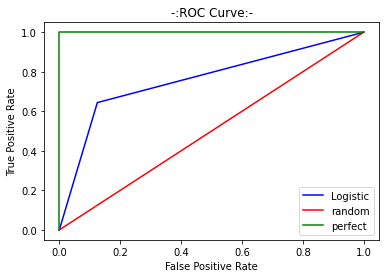

Logistic Model Performance Analysis Done!


In [30]:
eps=0.001
def model_lg_loss(model, x_cv, y_cv):
    lg_loss=pd.DataFrame(model.predict_proba(x_cv), index=range(len(y_cv)))
    lg_loss['y_cv']=y_cv.values 
    return sum(lg_loss.apply(lambda x: -np.log(eps + x[int(x.values[-1])]) if int(x.values[-1])==1 else 0, axis=1).values)/len(y_cv)

train_x, x_cv, train_y, y_cv = train_test_split(    x,    y,    test_size=0.25,    random_state=0)
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(train_x,train_y)
y_pred = model.predict(x_cv)

train_logloss = log_loss(model.predict(train_x), train_y)
test_logloss = log_loss(model.predict(x_cv), y_cv)
print("Train Log-loss:\t\t\t\t\t\t", model_lg_loss(model, train_x, train_y))
print("test Log-loss:\t\t\t\t\t\t",  model_lg_loss(model, x_cv, y_cv))

print("Accuracy of Logistic Model:\t\t\t\t",metrics.accuracy_score(y_cv, y_pred) )
print("Overall Accuracy of Logistic Model on CV dataset:\t",sum([y_pred==y_cv][0].values)/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset:\t",metrics.accuracy_score(train_y, model.predict(train_x)))# sum([model.predict(train_x)==train_y][0].values)/len(train_y))

true_pos_rate = len(y_pred[(y_cv==y_pred) & (y_pred==1)])/sum(y_cv==1)
true_neg_rate = len(y_pred[(y_cv==y_pred) & (y_pred==0)])/sum(y_cv==0)
false_pos_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==1)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) + len(y_pred[(y_cv==y_pred) & (y_pred==0)]))
false_neg_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==0)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==0)]) + len(y_pred[(y_cv==y_pred) & (y_pred==1)]))

print("False Negative Rate:\t\t\t\t\t", false_neg_rate)
print("False Positive Rate:\t\t\t\t\t", false_pos_rate)
print("True Negative Rate:\t\t\t\t\t", true_neg_rate)
print("True Positive Rate:\t\t\t\t\t", true_pos_rate)

print("Recall: TP/(TP+FN) is :=\t\t\t\t",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision: TP/(TP+FP) is :=\t\t\t\t", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score: 2/(1/recall + 1/precision) is :=\t\t", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )

print("AUC Score :=\t\t\t\t\t\t", roc_auc_score(y_cv, y_pred))

fpr, tpr, thresholds = roc_curve(y_cv, y_pred)

plt.plot(fpr,tpr,'b-', label= 'Logistic')
plt.plot([0,1],[0,1],'r-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.title(" -:ROC Curve:- ")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Logistic Model Performance Analysis Done!")

## <a id="15">15. Different Classification Model Performance Comparison</a>

In [31]:
%%time
model_comparison = pd.DataFrame(columns=['model','logloss','overall-accuracy','TPR','TNR','FPR','FNR'])

train_x, x_cv, train_y, y_cv = train_test_split(    x,    y,    test_size=0.25,    random_state=0)

models=[LogisticRegression(penalty='l2', solver='liblinear'),
        GaussianNB(),
        KNeighborsClassifier(n_neighbors=5), 
        RandomForestClassifier( random_state=0, oob_score=True, n_estimators=300, criterion='gini')]

for model in tqdm(models):
    model.fit(train_x, train_y)
    y_pred_model=model.predict(x_cv)
    model_comparison.loc[len(model_comparison)] = np.array([str(type(model)).split(".")[-1][:-2],
                                                            model_lg_loss(model, x_cv, y_cv),
                                                            metrics.accuracy_score(y_cv, y_pred_model),  
                                                            confusion_matrix(y_cv, y_pred_model)[1,1] / sum( confusion_matrix( y_cv, y_pred_model)[:,1] ),  
                                                            confusion_matrix(y_cv, y_pred_model)[0,0] / sum( confusion_matrix( y_cv, y_pred_model)[0,:] ), 
                                                            confusion_matrix(y_cv, y_pred_model)[1,0] / sum( confusion_matrix( y_cv, y_pred_model)[0,:] ),   
                                                            confusion_matrix(y_cv, y_pred_model)[0,1] / sum( confusion_matrix( y_cv, y_pred_model)[:,1] )])
print("Model Comparison Done!")
model_comparison


100%|██████████| 4/4 [34:20<00:00, 515.13s/it]

Model Comparison Done!
CPU times: user 35min 58s, sys: 10min 28s, total: 46min 26s
Wall time: 34min 20s


,model,logloss,overall-accuracy,TPR,TNR,FPR,FNR
0,LogisticRegression,0.22364348426842545,0.7894471268006965,0.7521663237952746,0.8750058952068038,0.20955495118768766,0.24783367620472538
1,GaussianNB,0.3383147454593239,0.7107705398132025,0.5791884816753927,0.6563173036110107,0.11587618493656758,0.42081151832460734
2,KNeighborsClassifier,0.29264097770242775,0.7968280037992718,0.7446660884648743,0.8611560893556146,0.18397761393469683,0.25533391153512575
3,RandomForestClassifier,0.17880570847318633,0.8338807978470794,0.8004593156777813,0.892094134662244,0.1560421939601641,0.19954068432221866


## <a id="16">16. Varying threshold to minimise False Duplicates</a>
Which error- FPR or FNR is important for us ?

When searching for duplicates, if the model predict a wrong question as duplicate, then that will be more costly rather than predicting a true duplicate question as non-duplicate

So,considering **Duplicate='Yes'** as Positive Class & **Duplicate='No'** as Negative Class, 
* **FPR** = True Non-Duplicate Questions that were predicted Duplicate by model
* **FNR** = True Duplicate Questions that were predicted Non-Duplicate by model
* **TPR** = True Duplicate Questions that were predicted Duplicate by Model
* **TNR** = True Non-Duplicate Questions that were predicted Non-Duplicate by model

In [32]:
"""
train_x, x_cv, train_y, y_cv = train_test_split(    x,    y,    test_size=0.25,    random_state=0)
model = LogisticRegression(penalty='l2', solver='liblinear')

wTx =  np.dot(x_cv,model.coef_[0])
cv_prob_predict = 1/(np.exp(-wTx)+1)
cv_logloss = [ log_loss(y_cv, [1 if i > threshold/10 else 0 for i in cv_prob_predict]) for threshold in list(range(0, 10,1))]

wTx =  np.dot(x,model.coef_[0])
train_prob_predict = 1/(np.exp(-wTx)+1)
train_logloss = [  log_loss(y, [1 if i > threshold/10 else 0 for i in train_prob_predict]) for threshold in list(range(0, 10,1))]

tpr=[];tnr=[];fpr=[];fnr=[]; acc=[]
for threshold in np.arange(0,1,0.05):
    y_pred = np.array([1 if i > threshold/10 else 0 for i in cv_prob_predict])
    tpr.append( confusion_matrix(y_cv, y_pred)[1,1] / sum( confusion_matrix( y_cv, y_pred)[:,1] ) )
    tnr.append( confusion_matrix(y_cv, y_pred)[0,0] / sum( confusion_matrix( y_cv, y_pred)[0,:] ) )
    acc.append( metrics.accuracy_score(y_cv, y_pred) )
    fpr.append( confusion_matrix(y_cv, y_pred)[1,0] / sum( confusion_matrix( y_cv, y_pred)[0,:] ))
    fnr.append( confusion_matrix(y_cv, y_pred)[0,1] / sum( confusion_matrix( y_cv, y_pred)[:,1] ))
"""

"\ntrain_x, x_cv, train_y, y_cv = train_test_split(    x,    y,    test_size=0.25,    random_state=0)\nmodel = LogisticRegression(penalty='l2', solver='liblinear')\n\nwTx =  np.dot(x_cv,model.coef_[0])\ncv_prob_predict = 1/(np.exp(-wTx)+1)\ncv_logloss = [ log_loss(y_cv, [1 if i > threshold/10 else 0 for i in cv_prob_predict]) for threshold in list(range(0, 10,1))]\n\nwTx =  np.dot(x,model.coef_[0])\ntrain_prob_predict = 1/(np.exp(-wTx)+1)\ntrain_logloss = [  log_loss(y, [1 if i > threshold/10 else 0 for i in train_prob_predict]) for threshold in list(range(0, 10,1))]\n\ntpr=[];tnr=[];fpr=[];fnr=[]; acc=[]\nfor threshold in np.arange(0,1,0.05):\n    y_pred = np.array([1 if i > threshold/10 else 0 for i in cv_prob_predict])\n    tpr.append( confusion_matrix(y_cv, y_pred)[1,1] / sum( confusion_matrix( y_cv, y_pred)[:,1] ) )\n    tnr.append( confusion_matrix(y_cv, y_pred)[0,0] / sum( confusion_matrix( y_cv, y_pred)[0,:] ) )\n    acc.append( metrics.accuracy_score(y_cv, y_pred) )\n    fpr.a

In [33]:
"""
plt.plot(np.arange(0,1,0.05), 1-np.array(acc),color='r', linewidth=3,label="Overall Error",marker='>',markersize=5) 
plt.plot(np.arange(0,1,0.05), fnr,     label="FNR",linewidth=3,marker='*',markersize=7) 
plt.plot(np.arange(0,1,0.05), fpr,  color='b',   label="FPR",marker='o',markersize=5)
plt.plot(np.arange(0,1,0.05), tpr,  color='c',   label="TPR",marker='o',markersize=5)
plt.plot(np.arange(0,1,0.05), tnr,  color='k',   label="TNR",marker='o',markersize=5)
plt.plot(np.arange(0,1,0.05), acc,  color='g', linewidth=2,  label="Overall Accuracy",marker='v',markersize=5)
plt.title("Variation of FPR & Overall Error with Threshold")
plt.xlabel("Threshold")
plt.legend(loc=(1.04,0.5))
plt.show()
"""

'\nplt.plot(np.arange(0,1,0.05), 1-np.array(acc),color=\'r\', linewidth=3,label="Overall Error",marker=\'>\',markersize=5) \nplt.plot(np.arange(0,1,0.05), fnr,     label="FNR",linewidth=3,marker=\'*\',markersize=7) \nplt.plot(np.arange(0,1,0.05), fpr,  color=\'b\',   label="FPR",marker=\'o\',markersize=5)\nplt.plot(np.arange(0,1,0.05), tpr,  color=\'c\',   label="TPR",marker=\'o\',markersize=5)\nplt.plot(np.arange(0,1,0.05), tnr,  color=\'k\',   label="TNR",marker=\'o\',markersize=5)\nplt.plot(np.arange(0,1,0.05), acc,  color=\'g\', linewidth=2,  label="Overall Accuracy",marker=\'v\',markersize=5)\nplt.title("Variation of FPR & Overall Error with Threshold")\nplt.xlabel("Threshold")\nplt.legend(loc=(1.04,0.5))\nplt.show()\n'

In [34]:
"""
plt.plot(np.arange(0,1,0.1), train_logloss, label="Train Log-loss",marker='o') 
plt.plot(np.arange(0,1,0.1), cv_logloss, label="CV Log-loss",marker='.') 
plt.legend()
plt.show()"""

'\nplt.plot(np.arange(0,1,0.1), train_logloss, label="Train Log-loss",marker=\'o\') \nplt.plot(np.arange(0,1,0.1), cv_logloss, label="CV Log-loss",marker=\'.\') \nplt.legend()\nplt.show()'

## <a id="17">17. K-Fold Cross Validation</a>

100%|██████████| 10/10 [02:59<00:00, 17.96s/it]


10 -Fold Cross validation Done!


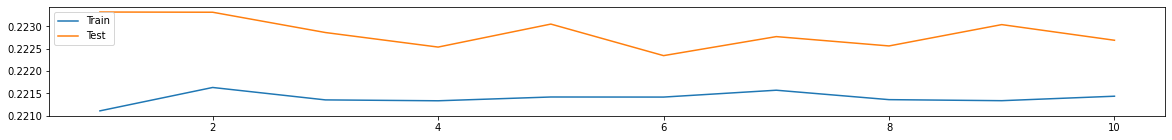

CPU times: user 3min 6s, sys: 15.6 s, total: 3min 21s
Wall time: 2min 59s


In [35]:

%%time
model = LogisticRegression(penalty='l2', solver='liblinear')
train_x,test_x,train_y,test_y=[None]*4
num_shuffles=10
shuffled = pd.DataFrame(columns=['Shuffle No','train_logloss','cv_logloss','train_accuracy','cv_accuracy','train_recall','cv_recall','train_precision','cv_precision','train_f1score','cv_f1score','train_auc','cv_auc'])
for i in tqdm(range(num_shuffles)):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=None,test_size=0.2,shuffle=True)
    model.fit(train_x,train_y)
  
    y_pred = model.predict(train_x)
    accuracy_train = sum([y_pred==train_y][0].values)/len(train_y)
  
    tr_precision = precision_score(train_y, y_pred)
    tr_recall = recall_score(train_y, y_pred)
    tr_f1score = f1_score(train_y, y_pred)
    tr_auc = roc_auc_score(train_y, y_pred)

    y_pred = model.predict(test_x)
    accuracy_cv = sum([y_pred==test_y][0].values)/len(test_y)

    cv_precision = precision_score(test_y, y_pred)
    cv_recall = recall_score(test_y, y_pred)
    cv_f1score = f1_score(test_y, y_pred)
    cv_auc = roc_auc_score(test_y, y_pred)
    
    train_logloss = log_loss(model.predict(train_x), train_y)
    test_logloss = log_loss(model.predict(x_cv), y_cv)
    shuffled.loc[len(shuffled.index)]=[int(i+1), model_lg_loss(model, train_x, train_y) ,model_lg_loss(model, x_cv, y_cv) ,  accuracy_train, accuracy_cv, tr_recall, cv_recall, tr_precision, cv_precision, tr_f1score, cv_f1score, tr_auc, cv_auc]

shuffled.head(5)
print(num_shuffles,"-Fold Cross validation Done!")

fig = plt.figure(figsize =(20, 2))
plt.plot(shuffled['Shuffle No'],shuffled['train_logloss'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_logloss'], label='Test')
plt.legend()
plt.show()


## <a id="18">18. Confidence Interval & p-value of Coefficients of Logistic Regression</a>

In [36]:

%%time
from sklearn.linear_model import LogisticRegression
import scipy.stats

def do_lreg(df):
    sample = df.sample(df.shape[0], replace=True)
    X_tr = sample[[c for c in sample.columns if c != 'y']]
    y_tr = sample.y
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X_tr, y_tr)
    params = [lr.intercept_[0]] +  list(lr.coef_[0])
    return params

def get_se(X, y):
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X, y)
    df = pd.DataFrame(X)
    df['y'] = y
    r_df = pd.DataFrame([do_lreg(df) for _ in range(10)])
    w = [lr.intercept_[0]] + list(lr.coef_[0])
    se = r_df.std()
    dof = X.shape[0] - X.shape[1] - 1
    summary = pd.DataFrame({
        'coeff': w,
        'se': se,
        'z': w / se,
        '.025': w - se,
        '.975': w + se,
        'df': [dof for _ in range(len(w))]
    })
    summary['P>|z|'] = scipy.stats.t.sf(abs(summary.z), df=summary.df)
    return summary

from sklearn.preprocessing import StandardScaler
x= df.copy()
x.drop(['id','qid1','qid2','question1','question2','is_duplicate','q1_cluster', 'q2_cluster'], axis=1, inplace=True)
sc_x = StandardScaler()
#x.insert(loc=0, column='x0', value=[1]*len(x))
x.iloc[:,:-4] = sc_x.fit_transform(x.iloc[:,:-4]) 
y=df['is_duplicate'].apply(lambda x: 0 if x=="No" else 1)

logistic_coeff_summary = get_se(np.array(x), np.array(y))
logistic_coeff_summary['features'] = ['intercept']+list(x.columns)
print("Logistic Model Summary Done!")
logistic_coeff_summary


Logistic Model Summary Done!
CPU times: user 4min 34s, sys: 2.87 s, total: 4min 37s
Wall time: 4min 37s


,coeff,se,z,.025,.975,df,P>|z|,features
0,-4.223307,0.101799,-41.486545,-4.325107,-4.121508,404258,0.000000e+00,intercept
1,1.456483,0.015042,96.827622,1.441441,1.471525,404258,0.000000e+00,freq_qid1
2,1.603172,0.025324,63.307409,1.577848,1.628495,404258,0.000000e+00,freq_qid2
3,-0.316242,0.025079,-12.609667,-0.341321,-0.291163,404258,9.487967e-37,q1_length
4,0.416555,0.023356,17.834909,0.393199,0.439911,404258,2.016291e-71,q2_length
5,-0.026439,0.005183,-5.100685,-0.031622,-0.021255,404258,1.692891e-07,same_cluster
6,0.319324,0.023236,13.742431,0.296087,0.342560,404258,2.890940e-43,q1_wordsCount
7,-0.457501,0.019559,-23.390512,-0.477061,-0.437942,404258,3.213330e-121,q2_wordsCount
8,-0.128960,0.018368,-7.020758,-0.147328,-0.110592,404258,1.105063e-12,common_wordsCount
9,1.781744,0.023265,76.586125,1.758480,1.805009,404258,0.000000e+00,q1_freq+q2_freq


## <a id="19">19. Importing Test data</a>

In [37]:
df_test =  pd.read_csv('/kaggle/input/quora-question-pairs/test.csv')
print(df_test.shape)
print("Test Data imported")
df_test.head(2)

(2345796, 3)
Test Data imported


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?


In [38]:
df_test.isna().sum()

test_id      0
question1    2
question2    4
dtype: int64

## <a id="20">20. Missing values in Test Dataset</a>

In [39]:
df_test.loc[df_test.isnull().any(axis=1),:]

,test_id,question1,question2
379205,379205,How I can learn android app development?,NaN
817520,817520,How real can learn android app development?,NaN
943911,943911,How app development?,NaN
1046690,1046690,NaN,How I what can learn android app development?
1270024,1270024,How I can learn app development?,NaN
1461432,1461432,NaN,How distinct can learn android app development?


Imputing Nan values using "Unknown"

In [40]:
df_test = df_test.fillna("Unknown")
df_test.isna().sum(), df_test.shape

(test_id      0
 question1    0
 question2    0
 dtype: int64,
 (2345796, 3))

## <a id="21">21. Analysis of Unique & Repeated Questions in Test Set</a>

In [41]:
dff = df_test.copy()
dff.loc[:,'question1'] = dff.loc[:,'question1'].str.strip()
dff.loc[:,'question2'] = dff.loc[:,'question2'].str.strip()
questions_list = pd.concat([dff['question1'] , dff['question2']] )
unique_quesList = questions_list.value_counts()[questions_list.value_counts()==1].index
duplicate_quesList = questions_list.value_counts()[questions_list.value_counts()>1].index
print("Number of Questions which are unique: ",len(unique_quesList))
print("Number of Questions which are repeated: ",len(duplicate_quesList))
print("Total number of unique questions in Test dataset: ",len(questions_list.value_counts()))

Number of Questions which are unique:  4208103
Number of Questions which are repeated:  155665
Total number of unique questions in Test dataset:  4363768


## <a id="22">22. Test Data: Pre-processing of Text</a>

In [42]:
%%time
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",     "aren't": "are not",         "can't": "can not",         "can't've": "can not have",
    "'cause": "because",   "could've": "could have",    "couldn't": "could not",    "couldn't've": "could not have",
    "didn't": "did not",   "doesn't": "does not",       "don't": "do not",          "hadn't": "had not",
    "hadn't've": "had not have",    "hasn't": "has not","haven't": "have not",      "he'd": "he would",
    "he'd've": "he would have",     "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did",    "how'd'y": "how do you",     "how'll": "how will",       "how's": "how is",
    "i'd": "i would",      "i'd've": "i would have",    "i'll": "i will",           "i'll've": "i will have",
    "i'm": "i am",         "i've": "i have",            "isn't": "is not",          "it'd": "it would",
    "it'd've": "it would have",     "it'll": "it will", "it'll've": "it will have", "it's": "it is",
    "let's": "let us",     "ma'am": "madam",            "mayn't": "may not",        "might've": "might have",
    "mightn't": "might not",        "mightn't've": "might not have",                "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have",  "needn't": "need not",   "needn't've": "need not have",
    "o'clock": "of the clock",    "oughtn't": "ought not", "oughtn't've": "ought not have","shan't": "shall not",
    "sha'n't": "shall not","shan't've": "shall not have",  "she'd": "she would",    "she'd've": "she would have",
    "she'll": "she will",  "she'll've": "she will have",   "she's": "she is",       "should've": "should have",
    "shouldn't": "should not","shouldn't've": "should not have","so've": "so have", "so's": "so as",
    "that'd": "that would","that'd've": "that would have", "that's": "that is",     "there'd": "there would",
    "there'd've": "there would have","there's": "there is","they'd": "they would",  "they'd've": "they would have",
    "they'll": "they will","they'll've": "they will have", "they're": "they are",
    "they've": "they have","to've": "to have",    "wasn't": "was not",    "we'd": "we would","we'd've": "we would have",
    "we'll": "we will",    "we'll've": "we will have",    "we're": "we are","we've": "we have","weren't": "were not",
    "what'll": "what will",    "what'll've": "what will have",    "what're": "what are",    "what's": "what is",
    "what've": "what have",    "when's": "when is",    "when've": "when have",    "where'd": "where did",
    "where's": "where is",    "where've": "where have",    "who'll": "who will",    "who'll've": "who will have",
    "who's": "who is",    "who've": "who have",    "why's": "why is",    "why've": "why have",    "will've": "will have",
    "won't": "will not",    "won't've": "will not have",    "would've": "would have",    "wouldn't": "would not",
    "wouldn't've": "would not have",    "y'all": "you all",    "y'all'd": "you all would",    "y'all'd've": "you all would have",
    "y'all're": "you all are",    "y'all've": "you all have",    "you'd": "you would",    "you'd've": "you would have",
    "you'll": "you will",    "you'll've": "you will have",    "you're": "you are",    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q

dff['question1'] = dff['question1'].apply(preprocess)
dff['question2'] = dff['question2'].apply(preprocess)
print("Test Data Pre-Processing Done!")

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:408: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


Test Data Pre-Processing Done!
CPU times: user 23min 54s, sys: 6.12 s, total: 24min 1s
Wall time: 23min 59s


## <a id="23">23. Clustering of Questions</a>

In [43]:
%%time
test_document_corpus = list(set(list(dff['question1']) + list(dff['question2'])))
test_questions_cluster = pd.DataFrame({'questions': test_document_corpus , 'cluster_label':None})
x = vectorizer.fit_transform(test_questions_cluster['questions'].values)
vectorizer = TfidfVectorizer()
km = KMeans(n_clusters=9, max_iter=500, n_init=30)
km = km.fit(x)
test_questions_cluster['cluster_label'] = km.labels_
test_questions_cluster.head(3)

CPU times: user 4h 24min 42s, sys: 2min 19s, total: 4h 27min 1s
Wall time: 1h 22min 26s


,questions,cluster_label
0,,4
1,germany has a knack for incompetent allies if...,4
2,what is your most memorable school,4


In [44]:
dff = pd.merge( left=pd.merge(left=dff, right=test_questions_cluster, left_on="question1", right_on="questions"), right=test_questions_cluster , left_on="question2", right_on="questions")
dff.drop(["questions_x","questions_y"], axis=1, inplace=True)
dff.rename(columns={'cluster_label_x':'q1_cluster','cluster_label_y':'q2_cluster'}, inplace=True)
print("Test Questions Clusters Labelled")
dff.head(4)

Test Questions Clusters Labelled


,test_id,question1,question2,q1_cluster,q2_cluster
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,1,0
1,1,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,5,1
2,2,what but is the best way to send money from ch...,what you send money to china,7,2
3,3,which food not emulsifiers,what foods fibre,4,4


In [45]:
dff.columns

Index(['test_id', 'question1', 'question2', 'q1_cluster', 'q2_cluster'], dtype='object')

## <a id="24">24. Basic Text-Feature Engineering</a>

In [46]:
%%time
from fuzzywuzzy import fuzz
import sys

dff = pd.merge( pd.merge(dff,pd.DataFrame({'question1':dff['question1'].value_counts().index.values,'freq_qid1':dff['question1'].value_counts().values}), on='question1',how="left"),pd.DataFrame({'question2':dff['question2'].value_counts().index.values,'freq_qid2':dff['question2'].value_counts().values}) ,on='question2', how='left')
dff.loc[:,['q1_length']] = dff['question1'].apply(lambda x: len(x)).values
dff.loc[:,['q2_length']] = dff['question2'].apply(lambda x: len(x)).values
dff['same_cluster'] = dff[['q1_cluster','q2_cluster']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)
dff['q1_wordsCount'] = dff['question1'].apply(lambda x: len(x.split(" ")))
dff['q2_wordsCount'] = dff['question2'].apply(lambda x: len(x.split(" ")))
dff['common_wordsCount'] = dff[['question1','question2']].apply(lambda x: len(set(x[0].split(" ")).intersection(set(x[1].split(" ")))) , axis=1 )
dff['q1_freq+q2_freq'] = dff['freq_qid1']+dff['freq_qid2']
dff['q1_freq-q2_freq'] = abs(dff['freq_qid1']-dff['freq_qid2'])
dff['total_word_share'] = 2*dff['common_wordsCount']/(dff['q1_wordsCount']+dff['q2_wordsCount'])
print("Test Basic Feature Engineering Done!")
dff.head(2)

Test Basic Feature Engineering Done!
CPU times: user 1min 37s, sys: 1.57 s, total: 1min 39s
Wall time: 1min 39s


,test_id,question1,question2,q1_cluster,q2_cluster,freq_qid1,freq_qid2,q1_length,q2_length,same_cluster,q1_wordsCount,q2_wordsCount,common_wordsCount,q1_freq+q2_freq,q1_freq-q2_freq,total_word_share
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,1,0,1,1,56,67,0,11,14,3,2,0,0.240000
1,1,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,5,1,1,1,65,42,0,15,7,5,2,0,0.454545


## <a id="25">25. Advanced Text-Feature Engineering in Test Data</a>

In [47]:
%%time
STOP_WORDS = stopwords.words("english")
epsilon = 0.001
       
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def advanced_featureExtract(q1,q2):
    
    q1_tokens = q1.split(" ")
    q2_tokens = q2.split(" ")
    
    q1_stopwords = [word for word in q1_tokens if word in STOP_WORDS]
    q2_stopwords = [word for word in q2_tokens if word in STOP_WORDS]
    
    q1_words = [word for word in q1_tokens if word not in STOP_WORDS]
    q2_words = [word for word in q2_tokens if word not in STOP_WORDS]
        
    common_words = list(set(q1_words).intersection(set(q2_words)))
    common_stopwords = list(set(q1_stopwords).intersection(set(q2_stopwords)))
    common_tokens = list(set(q1_tokens).intersection(set(q2_tokens)))
    
    com_words_count_min = len(common_words)/(epsilon + min(len(q2_words), len(q1_words)) )
    com_words_count_max = len(common_words)/(epsilon + max(len(q2_words), len(q1_words)) )
    
    com_stopwords_count_min = len(common_words)/(epsilon + min(len(q2_stopwords), len(q1_stopwords)) )
    com_stopwords_count_max = len(common_stopwords)/(epsilon + max(len(q2_stopwords), len(q1_stopwords)) )
    
    com_token_count_min = len(common_tokens)/(epsilon + min(len(q2_tokens), len(q1_tokens)) )
    com_token_count_max = len(common_tokens)/(epsilon + max(len(q2_tokens), len(q1_tokens)) )
    
    last_word_eq  = 1 if q2_tokens[-1] == q1_tokens[-1] else 0
    first_word_eq = 1 if q2_tokens[0]  == q1_tokens[0]  else 0
    
    abs_len_diff = abs(len(q2_tokens) - len(q1_tokens))
    mean_len = (len(q2_tokens) + len(q1_tokens))/2
    
    longest_substring_ratio = get_longest_substr_ratio(q1, q2)
    
    return com_words_count_min, com_words_count_max, com_stopwords_count_min,  com_stopwords_count_max, com_token_count_min, com_token_count_max,  last_word_eq, first_word_eq, abs_len_diff, mean_len, longest_substring_ratio
       
token_features = dff.apply(lambda x: advanced_featureExtract(x["question1"], x["question2"]), axis=1)

dff["cwc_min"]       = list(map(lambda x: x[0], token_features))
dff["cwc_max"]       = list(map(lambda x: x[1], token_features))
dff["csc_min"]       = list(map(lambda x: x[2], token_features))
dff["csc_max"]       = list(map(lambda x: x[3], token_features))
dff["ctc_min"]       = list(map(lambda x: x[4], token_features))
dff["ctc_max"]       = list(map(lambda x: x[5], token_features))
dff["last_word_eq"]  = list(map(lambda x: x[6], token_features))
dff["first_word_eq"] = list(map(lambda x: x[7], token_features))
dff["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
dff["mean_len"]      = list(map(lambda x: x[9], token_features))
dff["longest_substring_ratio"] = list(map(lambda x: x[10], token_features))
print("Test Data Advanced Feature Engineering Done!")
dff.head(2)

Test Data Advanced Feature Engineering Done!
CPU times: user 39min 17s, sys: 4.21 s, total: 39min 21s
Wall time: 39min 23s


,test_id,question1,question2,q1_cluster,q2_cluster,freq_qid1,freq_qid2,q1_length,q2_length,same_cluster,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substring_ratio
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,1,0,1,1,56,67,0,...,0.299970,0.749813,0.000000,0.272702,0.214270,0,0,3,12.5,0.245614
1,1,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,5,1,1,1,65,42,0,...,0.499938,1.999000,0.142837,0.714184,0.333311,0,0,8,11.0,0.395349


In [48]:
dff.columns

Index(['test_id', 'question1', 'question2', 'q1_cluster', 'q2_cluster',
       'freq_qid1', 'freq_qid2', 'q1_length', 'q2_length', 'same_cluster',
       'q1_wordsCount', 'q2_wordsCount', 'common_wordsCount',
       'q1_freq+q2_freq', 'q1_freq-q2_freq', 'total_word_share', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substring_ratio'],
      dtype='object')

## <a id="26">26. Fuzzy Text-Similarity Ratios Extracted from Test Data</a>

In [49]:
%%time
dff['fuzz_ratio']           = dff[['question1','question2']].apply(lambda x: fuzz.ratio(           x[0],x[1]), axis=1)
dff['fuzz_partial_ratio']   = dff[['question1','question2']].apply(lambda x: fuzz.partial_ratio(   x[0],x[1]), axis=1)
dff['fuzz_token_sort_ratio']= dff[['question1','question2']].apply(lambda x: fuzz.token_sort_ratio(x[0],x[1]), axis=1)
dff['fuzz_token_set_ratio'] = dff[['question1','question2']].apply(lambda x: fuzz.token_set_ratio( x[0],x[1]), axis=1)
dff['fuzz_WRatio']          = dff[['question1','question2']].apply(lambda x: fuzz.WRatio(          x[0],x[1]), axis=1)
print("Test Fuzzy Ratios Done!")
dff.head(2) 

Test Fuzzy Ratios Done!
CPU times: user 13min 24s, sys: 2.56 s, total: 13min 27s
Wall time: 13min 27s


,test_id,question1,question2,q1_cluster,q2_cluster,freq_qid1,freq_qid2,q1_length,q2_length,same_cluster,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substring_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,fuzz_WRatio
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,1,0,1,1,56,67,0,...,0,0,3,12.5,0.245614,46,45,55,58,55
1,1,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,5,1,1,1,65,42,0,...,0,0,8,11.0,0.395349,49,57,58,82,86


## <a id="27">27. Cosine Similarity Extracted for Test data</a>

In [50]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

document_corpus = list(dff['question1'])+list(dff['question2'])
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(document_corpus)
q1_vectors = x[: (x.shape[0]//2) , :]
q2_vectors = x[(x.shape[0]//2) : , :]

ques_pair_vectors=[]
for i in tqdm(range(q1_vectors.shape[0])):
    ques_pair_vectors.append(q1_vectors[i].dot(q2_vectors[i].T).toarray()[0][0]   )

dff['cosine_similarity'] = ques_pair_vectors
print("Test Data Cosine Similarity Extracted!")
print("Columns: ",dff.columns)
dff.head(2)

100%|██████████| 2345796/2345796 [22:47<00:00, 1714.79it/s]


Test Data Cosine Similarity Extracted!
Columns:  Index(['test_id', 'question1', 'question2', 'q1_cluster', 'q2_cluster',
       'freq_qid1', 'freq_qid2', 'q1_length', 'q2_length', 'same_cluster',
       'q1_wordsCount', 'q2_wordsCount', 'common_wordsCount',
       'q1_freq+q2_freq', 'q1_freq-q2_freq', 'total_word_share', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substring_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio',
       'fuzz_token_set_ratio', 'fuzz_WRatio', 'cosine_similarity'],
      dtype='object')
CPU times: user 23min 57s, sys: 9.07 s, total: 24min 6s
Wall time: 24min 2s


,test_id,question1,question2,q1_cluster,q2_cluster,freq_qid1,freq_qid2,q1_length,q2_length,same_cluster,...,first_word_eq,abs_len_diff,mean_len,longest_substring_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,fuzz_WRatio,cosine_similarity
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,1,0,1,1,56,67,0,...,0,3,12.5,0.245614,46,45,55,58,55,0.288652
1,1,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,5,1,1,1,65,42,0,...,0,8,11.0,0.395349,49,57,58,82,86,0.595792


## <a id="28">28. Training Random Forrest Classifier Model on entire Train dataset</a>

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
x= df.copy()
x.drop(['id','qid1','qid2','question1','question2','is_duplicate','q1_cluster', 'q2_cluster'], axis=1, inplace=True)
sc_x = StandardScaler()
x.insert(loc=0, column='x0', value=[1]*len(x))
x.iloc[:,1:-1] = sc_x.fit_transform(x.iloc[:,1:-1])
y=df['is_duplicate'].apply(lambda x: 0 if x=="No" else 1)

model = RandomForestClassifier( random_state=0, oob_score=True, n_estimators=300, criterion='gini')
model.fit(x,y)
y_pred = model.predict(x)
print("Logloss of Logistic Model: ", log_loss(model.predict(x), y))
print("Training Model Done!")

Logloss of Logistic Model:  0.0027338144491960577
Training Model Done!


## <a id="29">29. Prediction on Test set & Submission</a>

In [52]:
from sklearn.preprocessing import StandardScaler
xx= dff.copy()
xx.drop(['test_id','question1','question2','q1_cluster', 'q2_cluster'], axis=1, inplace=True)
sc_x = StandardScaler()
xx.insert(loc=0, column='x0', value=[1]*len(xx))
xx.iloc[:,1:-1] = sc_x.fit_transform(xx.iloc[:,1:-1])
prob = model.predict_proba(xx)
print("Prediction Test Data Done!")

Prediction Test Data Done!


In [53]:
dff['is_duplicate']=pd.DataFrame(prob).iloc[:,1].values
submission =dff.loc[:,['test_id','is_duplicate']].copy()
submission.to_csv('submission.csv',index=False)
print("Submission File printed !")
submission

Submission File printed !


,test_id,is_duplicate
0,0,0.660000
1,1,0.750000
2,2,0.756667
3,3,0.030000
4,4,0.683333
...,...,...
2345791,2345791,0.070000
2345792,2345792,0.460000
2345793,2345793,0.640000
2345794,2345794,0.536667


In [54]:
#file.remove("/kaggle/working/asd.png")

In [55]:
submission.shape

(2345796, 2)